In [ ]:
https://machinelearningmastery.com/making-linear-predictions-in-pytorch/

In [1]:

import torch



In [2]:
# defining the parameters 'w' and 'b'
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# function of the linear equation for making predictions


def forward(x):
    y_pred = w * x + b
    return y_pred


# let's predict y_pred at x = 2
x = torch.tensor([[2.0]])
y_pred = forward(x)
print("prediction of y at 'x = 2' is: ", y_pred)

# making predictions at multiple values of x
x = torch.tensor([[3.0], [4.0]])
y_pred = forward(x)
print("prediction of y at 'x = 3 & 4' is: ", y_pred)


prediction of y at 'x = 2' is:  tensor([[7.]], grad_fn=<AddBackward0>)
prediction of y at 'x = 3 & 4' is:  tensor([[10.],
        [13.]], grad_fn=<AddBackward0>)


In [4]:

from torch.nn import Linear
torch.manual_seed(42)

linear_regression = Linear(in_features=1, out_features=1)
print("displaying parameters w and b: ",
      list(linear_regression.parameters()))


displaying parameters w and b:  [Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [5]:

print("getting python dictionary: ",linear_regression.state_dict())
print("dictionary keys: ",linear_regression.state_dict().keys())
print("dictionary values: ",linear_regression.state_dict().values())

getting python dictionary:  OrderedDict([('weight', tensor([[0.7645]])), ('bias', tensor([0.8300]))])
dictionary keys:  odict_keys(['weight', 'bias'])
dictionary values:  odict_values([tensor([[0.7645]]), tensor([0.8300])])


In [6]:
# make predictions at x = 2
x = torch.tensor([[2.0]])
y_pred = linear_regression(x)
print("getting the prediction for x: ", y_pred)


getting the prediction for x:  tensor([[2.3591]], grad_fn=<AddmmBackward0>)


In [7]:
# making predictions at multiple values of x
x = torch.tensor([[3.0], [4.0]])
y_pred = linear_regression(x)
print("prediction of y at 'x = 3 & 4' is: ", y_pred)


prediction of y at 'x = 3 & 4' is:  tensor([[3.1236],
        [3.8882]], grad_fn=<AddmmBackward0>)


In [8]:
import torch
from torch import nn

torch.manual_seed(42)


class Linear_Regression(nn.Module):
    def __init__(self, input_sample, output_sample):
        # Inheriting properties from the parent calss
        super(Linear_Regression, self).__init__()
        self.linear = nn.Linear(input_sample, output_sample)

    # define function to make predictions
    def forward(self, x):
        output = self.linear(x)
        return output


model = Linear_Regression(input_sample=1, output_sample=1)
print("printing the model parameters: ", list(model.parameters()))

x = torch.tensor([[2.0]])
y_pred = model(x)
print("getting the prediction for x: ", y_pred)

x = torch.tensor([[3.0], [4.0]])
y_pred = model(x)
print("prediction of y at 'x = 3 & 4' is: ", y_pred)


printing the model parameters:  [Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]
getting the prediction for x:  tensor([[2.3591]], grad_fn=<AddmmBackward0>)
prediction of y at 'x = 3 & 4' is:  tensor([[3.1236],
        [3.8882]], grad_fn=<AddmmBackward0>)


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
...
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X


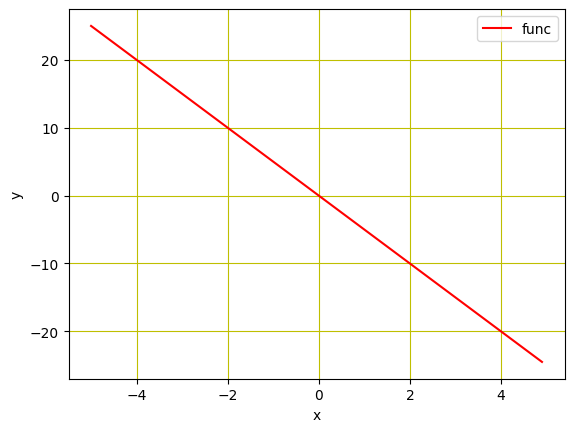

In [6]:
...
# Plot the line in red with grids
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()


In [7]:

...
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())


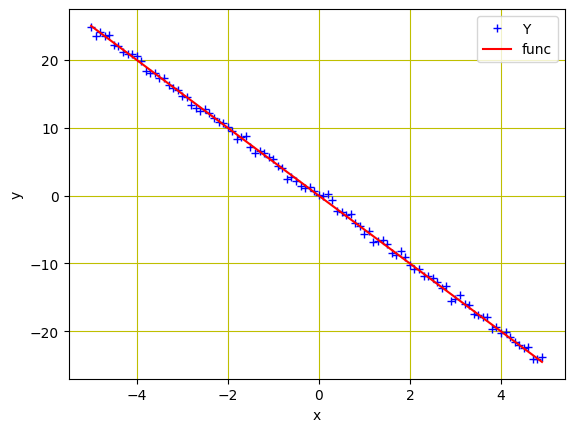

In [8]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()


0,	208.35955810546875,	-1.6690053939819336
1,	92.7994613647461,	-7.225779056549072
2,	41.38802719116211,	-3.519411087036133
3,	18.515661239624023,	-5.99155855178833
4,	8.339986801147461,	-4.3426361083984375
5,	3.8129472732543945,	-5.44246768951416
6,	1.7989152669906616,	-4.7088799476623535
7,	0.902893602848053,	-5.198183059692383
8,	0.5042638778686523,	-4.871817588806152
9,	0.3269180655479431,	-5.089503765106201
10,	0.24801872670650482,	-4.94430685043335
11,	0.21291697025299072,	-5.041153430938721
12,	0.1973007619380951,	-4.976556777954102
13,	0.1903529316186905,	-5.019642353057861
14,	0.18726196885108948,	-4.990904331207275
15,	0.18588687479496002,	-5.010072708129883
16,	0.18527521193027496,	-4.997287273406982
17,	0.18500305712223053,	-5.005815505981445
18,	0.18488197028636932,	-5.000126838684082
19,	0.18482814729213715,	-5.0039215087890625


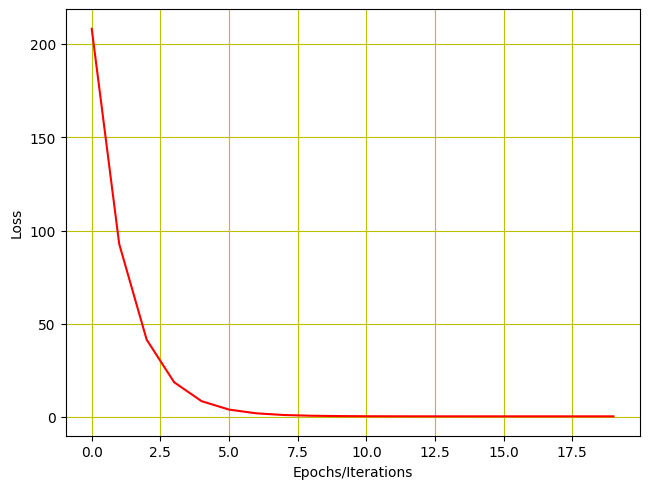

: 

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction


def forward(x):
    return w * x

# evaluating data points with Mean Square Error


def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)


w = torch.tensor(-10.0, requires_grad=True)

step_size = 0.1
loss_list = []
iter = 20

for i in range(iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()
